# QUESTION 1

In [148]:
# Import frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# A

In [149]:
df=pd.read_csv('/content/drive/MyDrive/research-assistant/ratings.csv')

In [150]:
df.head()

,aspect,worker,time,rating
0,how happy you feel,AW31492615119,1502372036608,69
1,how much you like your home house or apartment,AW31492615119,1502372036695,67
2,how satisfied you are with your life,AW31492615119,1502372036780,67
3,the extent to which you feel the things you do...,AW31492615119,1502372036849,63
4,the quality of your sleep,AW31492615119,1502372036929,59


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18189 entries, 0 to 18188
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aspect  18189 non-null  object
 1   worker  18189 non-null  object
 2   time    18189 non-null  int64 
 3   rating  18189 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 568.5+ KB


In [152]:
df['worker'].value_counts()

AW40198125962      20
AW20387262845      20
AW22873047111      20
AW53929080867YY    20
AW23505874445      20
                   ..
AW37941285173      17
AW34219602696OO    17
AW27695606524      17
AW38701174442OO    17
AW62795227570      17
Name: worker, Length: 1056, dtype: int64

# B

In [153]:
len(df['worker'].value_counts())

1056

In [154]:
df['aspect'].value_counts()

the quality of your sleep                                                     1075
your emotional stability                                                      1074
you feeling that your work has value                                          1074
your physical safety and security                                             1072
you being a good moral person and living according to your personal values    1072
you being able to spend enough time with the ones you love                    1071
you not feeling anxious                                                       1071
your mental health                                                            1071
the extent to which you feel the things you do in your life are worthwhile    1071
how satisfied you are with your life                                          1070
your physical fitness                                                         1069
your sense of connection with other people                                    1068
how 

In [155]:
len(df['aspect'].value_counts())

17

# C

In [156]:
df[["aspect" , "worker"]].head()

,aspect,worker
0,how happy you feel,AW31492615119
1,how much you like your home house or apartment,AW31492615119
2,how satisfied you are with your life,AW31492615119
3,the extent to which you feel the things you do...,AW31492615119
4,the quality of your sleep,AW31492615119


In [157]:
values_duplicated= df.duplicated(subset=['aspect', 'worker'])
values_duplicated

0        False
1        False
2        False
3        False
4        False
         ...  
18184     True
18185     True
18186     True
18187     True
18188     True
Length: 18189, dtype: bool

Number of repeated values

In [158]:
values_duplicated.sum()

237

In [159]:
df.loc[df.duplicated(keep='last', subset=['aspect', 'worker']), :]

,aspect,worker,time,rating
83,your physical safety and security,AW8132561106,1482545562860,89
114,your knowledge skills and access to information,AW35167700734,1502743102576,47
117,your physical safety and security,AW35167700734,1502743102820,38
187,how happy you feel,AW37637282089,1502492098560,36
392,how much you like your home house or apartment,AW47128939530,1482482253907,36
...,...,...,...,...
17593,your physical safety and security,AW17145364086YY,1502210295028,75
17662,your sense of connection with other people,AW57726153246YY,1502691722740,27
17712,your physical safety and security,AW11188437452YY,1502377805168,48
17907,you being able to spend enough time with the o...,AW37808030322YY,1493392032275,88


In [160]:
len(df.loc[df.duplicated(keep='last', subset=['aspect', 'worker']), :])

237

Dropp

In [161]:
cleaned_df=df.drop_duplicates(keep='last', subset=['aspect', 'worker'])

In [162]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17952 entries, 0 to 18188
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   aspect  17952 non-null  object
 1   worker  17952 non-null  object
 2   time    17952 non-null  int64 
 3   rating  17952 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 701.2+ KB


# D

In [163]:
cleaned_df.head()

,aspect,worker,time,rating
0,how happy you feel,AW31492615119,1502372036608,69
1,how much you like your home house or apartment,AW31492615119,1502372036695,67
2,how satisfied you are with your life,AW31492615119,1502372036780,67
3,the extent to which you feel the things you do...,AW31492615119,1502372036849,63
4,the quality of your sleep,AW31492615119,1502372036929,59


In [164]:
new_df=cleaned_df.groupby("worker").agg({"rating":['mean' , "count" , "min" , "max"]})
new_df

rating               
                     mean count min  max
worker                                  
AW1005987207    69.529412    17  53   78
AW10083168508   25.941176    17   1   45
AW10108518316   95.529412    17  84  100
AW10192560152   61.470588    17  44   75
AW1039734587YY  76.294118    17  59   93
...                   ...   ...  ..  ...
AW9732731740    77.529412    17  64   85
AW9792414598    43.352941    17  27   59
AW9806860651    33.529412    17  19   53
AW988514063OO   60.235294    17  48   72
AW9961673406    86.882353    17  76   96

[1056 rows x 4 columns]

In [165]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, AW1005987207 to AW9961673406
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (rating, mean)   1056 non-null   float64
 1   (rating, count)  1056 non-null   int64  
 2   (rating, min)    1056 non-null   int64  
 3   (rating, max)    1056 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 41.2+ KB


In [166]:
new_df.columns

MultiIndex([('rating',  'mean'),
            ('rating', 'count'),
            ('rating',   'min'),
            ('rating',   'max')],
           )

In [167]:
subjective_riches = new_df[('rating',  'mean')]
subjective_riches

worker
AW1005987207      69.529412
AW10083168508     25.941176
AW10108518316     95.529412
AW10192560152     61.470588
AW1039734587YY    76.294118
                    ...    
AW9732731740      77.529412
AW9792414598      43.352941
AW9806860651      33.529412
AW988514063OO     60.235294
AW9961673406      86.882353
Name: (rating, mean), Length: 1056, dtype: float64

In [168]:
subjective_riches.describe()

count    1056.000000
mean       61.641154
std        19.012507
min         5.764706
25%        49.058824
50%        61.441176
75%        75.073529
max       100.000000
Name: (rating, mean), dtype: float64

# QUESTION 2


# A

In [169]:
df_demographics=pd.read_csv("/content/drive/MyDrive/research-assistant/demographics.csv")

In [170]:
df_demographics.head()

,worker,age,male,income,education,race
0,AW31492615119,23,0,30000,Some college,Asian (non-Hispanic)
1,AW45861491036,35,0,50000,Some college,Black (non-Hispanic)
2,AW62562980372,28,0,30000,Some college,Hispanic (any race)
3,AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic)
4,AW8132561106,38,0,50000,Master's degree,White (non-Hispanic)


In [171]:
df_demographics.set_index("worker" , inplace=True)

In [172]:
df_demographics.head()

,age,male,income,education,race
worker,,,,,
AW31492615119,23,0,30000,Some college,Asian (non-Hispanic)
AW45861491036,35,0,50000,Some college,Black (non-Hispanic)
AW62562980372,28,0,30000,Some college,Hispanic (any race)
AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic)
AW8132561106,38,0,50000,Master's degree,White (non-Hispanic)


# B

In [173]:
len(df.index)

18189

In [174]:
type(subjective_riches)

pandas.core.series.Series

In [175]:
subjective_df=pd.DataFrame(subjective_riches)

In [176]:
subjective_df.index

Index(['AW1005987207', 'AW10083168508', 'AW10108518316', 'AW10192560152',
       'AW1039734587YY', 'AW10414823617', 'AW10499348166OO', 'AW10537409847',
       'AW10593137781', 'AW10684824993',
       ...
       'AW9169221869', 'AW9332387770', 'AW9418904597', 'AW9622509677',
       'AW9724167447', 'AW9732731740', 'AW9792414598', 'AW9806860651',
       'AW988514063OO', 'AW9961673406'],
      dtype='object', name='worker', length=1056)

In [177]:
df_demographics = pd.concat([df_demographics,subjective_df], axis=1, join="inner")
df_demographics

,age,male,income,education,race,"(rating, mean)"
worker,,,,,,
AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),63.647059
AW45861491036,35,0,50000,Some college,Black (non-Hispanic),53.764706
AW62562980372,28,0,30000,Some college,Hispanic (any race),58.294118
AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),33.529412
AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),77.705882
...,...,...,...,...,...,...
AW49464443148YY,22,0,10000,Some college,White (non-Hispanic),73.705882
AW11201728006YY,24,1,90000,Some college,White (non-Hispanic),39.470588
AW37808030322YY,27,0,30000,Bachelor's degree,White (non-Hispanic),85.529412


In [178]:
df_demographics.columns

Index(['age', 'male', 'income', 'education', 'race', ('rating', 'mean')], dtype='object')

In [179]:

df_demographics.rename(columns={('rating', 'mean'): 'subjective_riches'}, inplace=True)

In [180]:
df_demographics

,age,male,income,education,race,subjective_riches
worker,,,,,,
AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),63.647059
AW45861491036,35,0,50000,Some college,Black (non-Hispanic),53.764706
AW62562980372,28,0,30000,Some college,Hispanic (any race),58.294118
AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),33.529412
AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),77.705882
...,...,...,...,...,...,...
AW49464443148YY,22,0,10000,Some college,White (non-Hispanic),73.705882
AW11201728006YY,24,1,90000,Some college,White (non-Hispanic),39.470588
AW37808030322YY,27,0,30000,Bachelor's degree,White (non-Hispanic),85.529412


# D

In [182]:
!pip3 install statsmodels

In [192]:
# Import the `api` model of `statsmodels` under alias `sm`

import statsmodels.api as sm

# Import the `datetools` module from `pandas`

# Add a constant 
X = sm.add_constant(df_demographics['income'])

# Construct the model
model = sm.OLS(df_demographics['subjective_riches'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      subjective_riches   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     41.57
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           1.73e-10
Time:                        23:23:25   Log-Likelihood:                -4587.5
No. Observations:                1056   AIC:                             9179.
Df Residuals:                    1054   BIC:                             9189.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.2790      1.011     55.691      0.0

### With a general form of : 
subjective_riches = 0.00009269(income) + 56.279
A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for our coefficient (56.279) .
The  p value of income is saying there is a 0% chance  the Income  variable has no effect on the dependent variable, subjective_riches.

[0.025 and 0.975] are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

E

# 3

In [197]:

cleaned_df.head()


,aspect,worker,time,rating
0,how happy you feel,AW31492615119,1502372036608,69
1,how much you like your home house or apartment,AW31492615119,1502372036695,67
2,how satisfied you are with your life,AW31492615119,1502372036780,67
3,the extent to which you feel the things you do...,AW31492615119,1502372036849,63
4,the quality of your sleep,AW31492615119,1502372036929,59


In [200]:
df_health=cleaned_df[cleaned_df["aspect"]=="your health"]
df_health.set_index("worker" , inplace=True)
df_health.head()

,aspect,time,rating
worker,,,
AW31492615119,your health,1502372037637,67
AW45861491036,your health,1483197907952,61
AW62562980372,your health,1499791229928,66
AW9806860651,your health,1500067529629,39
AW8132561106,your health,1482545562518,79


In [201]:
df_demographics = pd.concat([df_demographics,df_health], axis=1, join="inner")
df_demographics.head()

,age,male,income,education,race,subjective_riches,aspect,time,rating
worker,,,,,,,,,
AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),63.647059,your health,1502372037637,67
AW45861491036,35,0,50000,Some college,Black (non-Hispanic),53.764706,your health,1483197907952,61
AW62562980372,28,0,30000,Some college,Hispanic (any race),58.294118,your health,1499791229928,66
AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),33.529412,your health,1500067529629,39
AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),77.705882,your health,1482545562518,79


In [202]:

df_demographics.rename(columns={'rating': 'health'}, inplace=True)
df_demographics.head()

,age,male,income,education,race,subjective_riches,aspect,time,health
worker,,,,,,,,,
AW31492615119,23,0,30000,Some college,Asian (non-Hispanic),63.647059,your health,1502372037637,67
AW45861491036,35,0,50000,Some college,Black (non-Hispanic),53.764706,your health,1483197907952,61
AW62562980372,28,0,30000,Some college,Hispanic (any race),58.294118,your health,1499791229928,66
AW9806860651,55,1,70000,Bachelor's degree,White (non-Hispanic),33.529412,your health,1500067529629,39
AW8132561106,38,0,50000,Master's degree,White (non-Hispanic),77.705882,your health,1482545562518,79


In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NameError: ignored

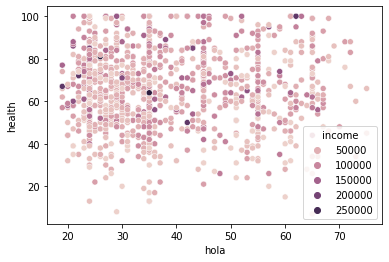

In [206]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x = df_demographics['age'],     y = df_demographics['health'], hue = df_demographics['income']) 
plt.xlabel("") 
plt.ylabel(selected_y_var) 
plt.title("Scatterplot of Palmer's Penguins")
plt.plot(fig)

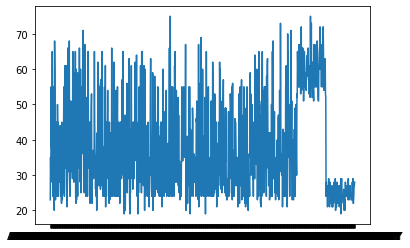

In [208]:
plt.plot(df_demographics['age'])
plt.show()

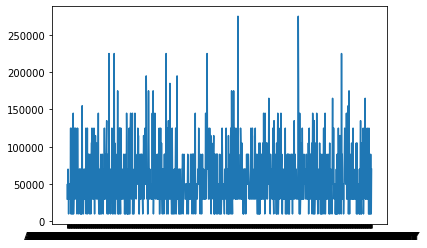

In [209]:
plt.plot(df_demographics['income'])
plt.show()

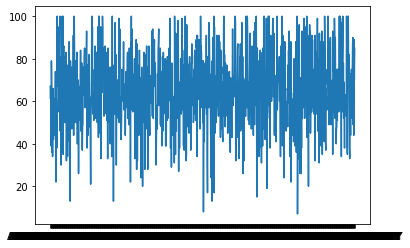

In [210]:
plt.plot(df_demographics['health'])
plt.show()